### 도로의 경우
1. 우선 도로의 각 지점마다 점을 찍는다.
2. 그 점의 위치 좌표를 찍고 signed distance transform 코드 적용


### 빌딩의 경우
1. 각 건물들의 위치정보? 픽셀 정보를 읽는다. (하얀색 픽셀이면 읽어와라)
2. 그 점의 위치 좌표를 찍고 signed distance transform 코드 적용

In [3]:
path = 'ㅎㅎㅎ.png'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [4]:
img = cv2.imread(path)

In [15]:
import cv2
import numpy as np
from math import exp
path = 'ㅎㅎㅎ.png'

# Probability as a function of distance from the center derived
# from a gaussian distribution with mean = 0 and stdv = 1
scaledGaussian = lambda x : exp(-(1/2)*(x**2))

img = cv2.imread(path, 0)
imgSize = 1024
isotropicGrayscaleImage = cv2.imread(path)
#np.zeros((imgSize,imgSize),np.uint8)
rows,cols = img.shape

for i in range(rows):
    for j in range(cols):

    # find euclidian distance from center of image (imgSize/2,imgSize/2) 
    # and scale it to range of 0 to 2.5 as scaled Gaussian
    # returns highest probability for x=0 and approximately
    # zero probability for x > 2.5
        if img[i,j] == 255:
            distanceFromCenter = np.linalg.norm(np.array([i-imgSize/2,j-imgSize/2]))
            distanceFromCenter = 2.5*distanceFromCenter/(imgSize/2)
            scaledGaussianProb = scaledGaussian(distanceFromCenter)
            isotropicGrayscaleImage[i,j] = np.clip(scaledGaussianProb*255,0,255)

# Convert Grayscale to HeatMap Using Opencv
isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGrayscaleImage, 
                                                  cv2.COLORMAP_JET)

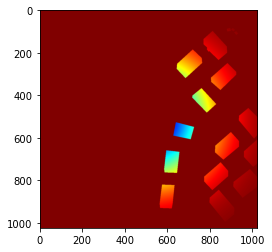

In [16]:
plt.imshow(isotropicGaussianHeatmapImage)

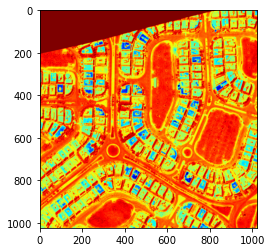

In [91]:
img = cv2.imread('ggg.png',1)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

heatmap_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET)

fin = cv2.addWeighted(heatmap_img, 0.99, img, 0.01, 0)

plt.imshow(fin)

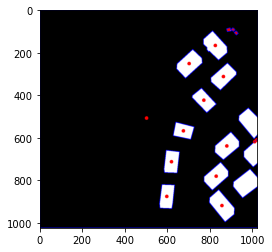

In [5]:
import cv2

src = cv2.imread("ㅎㅎㅎ.png")
dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
    M = cv2.moments(i)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    
    cv2.circle(dst, (cX, cY), 3, (255, 0, 0), 10)
    cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)
plt.imshow(dst)

In [79]:
xlist = []
ylist = []
for i in contours:
    M = cv2.moments(i)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    
    xlist.append(cX)
    ylist.append(cY)
    
    cv2.circle(dst, (cX, cY), 3, (255, 0, 0), -1)
    cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)

    for pair in zip(xlist, ylist):

        # find euclidian distance from center of image (imgSize/2,imgSize/2) 
        # and scale it to range of 0 to 2.5 as scaled Gaussian
        # returns highest probability for x=0 and approximately
        # zero probability for x > 2.5
        distanceFromCenter = np.linalg.norm(np.array([pair[0]-pair[0]/2,pair[1]-pair[1]/2]))
        distanceFromCenter = 2.5*distanceFromCenter/(pair[0]/2)
        scaledGaussianProb = scaledGaussian(distanceFromCenter)
        dst[pair] = np.clip(scaledGaussianProb*255,0,255)

# Convert Grayscale to HeatMap Using Opencv
isotropicGaussianHeatmapImage = cv2.applyColorMap(dst, 
                                                  cv2.COLORMAP_JET)

In [95]:
print(xlist)
print(ylist)

[500, 854, 595, 827, 617, 1008, 1016, 1017, 877, 673, 769, 861, 700, 921, 823, 906, 886]
[507, 918, 875, 780, 712, 618, 611, 610, 638, 567, 423, 312, 251, 107, 166, 91, 92]


/home/ssac18/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


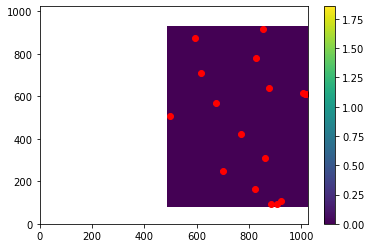

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import math

# POINT DATASET
#xlist
#ylist

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

#GETTING X,Y MIN AND MAX
x_min=min(xlist)
x_max=max(xlist)
y_min=min(ylist)
y_max=max(ylist)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(xlist)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-xlist[i])**2+(yc[j][k]-ylist[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(xlist, ylist,'ro')
plt.xlim(0,1024)
plt.ylim(0,1024)
plt.colorbar()
plt.show()

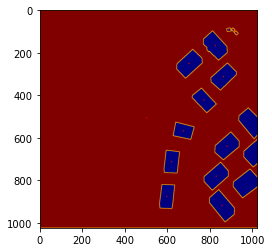

In [85]:
plt.imshow(isotropicGaussianHeatmapImage)

In [ ]:
img = cv2.imread('ggg.png',1)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

heatmap_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET)

fin = cv2.addWeighted(heatmap_img, 0.99, img, 0.01, 0)

plt.imshow(fin)

In [30]:
# Third party modules
import numpy
from PIL import Image


def get_image(image_path):
    """Get a numpy array of an image so that one can access values[x][y]."""
    image = Image.open(image_path, "r")
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = numpy.array(pixel_values).reshape((width, height, channels))
    return pixel_values


image = get_image('ㅎㅎㅎ.png')
#plt.imshow(image)

print(image[2].shape)
# if get_image(path) == (0,0,0):
    

(1024, 3)


In [50]:
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt

xedges = [0, 1, 3, 5]
yedges = [0, 2, 3, 4, 6]

fig = plt.figure(figsize=(7, 3))
img = NonUniformImage(fig, interpolation='bilinear')
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
img.set_data(xcenters, ycenters, H)
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

<Figure size 504x216 with 0 Axes>

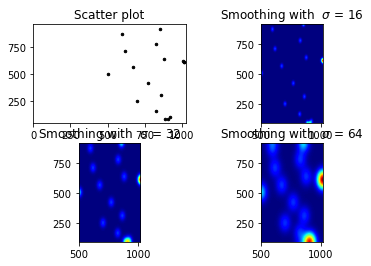

<Figure size 720x1440 with 0 Axes>

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1024):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)

sigmas = [0, 16, 32, 64]

img = cv2.imread(path,0)
rows,cols = img.shape

# for i in range(rows):
#     for j in range(cols):
#         if img[i,j] == 255:
#             img, extent = myplot(i, j, 16)
#             ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
#             ax.set_title("Smoothing with  $\sigma$ = %d" % s)
#             #extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#             #ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
#             #ax.set_title("Smoothing with  $\sigma$ = %d" % s)
        
        
# Generate some test data
# x = np.random.randn(1000)
# y = np.random.randn(1000)

        
for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(xlist, ylist, 'k.', markersize=5)
        ax.set_xlim([0, 1024])
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(xlist, ylist, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        #ax.set_xlim([0, 1024])
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.figure(figsize=(10,20))
plt.show()

In [113]:
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
# x = np.random.normal(2, 1, 100)
# y = np.random.normal(1, 1, 100)
img = cv2.imread(path)
xedges = [i for i in range(len(img))]
yedges = [i for i in range(len(img))]
H, xedges, yedges = np.histogram2d(xlist, ylist, bins=(1024, 1024))
H = H.T  # Let each row list bins with common y range.

ax = fig.add_subplot(111, title='NonUniformImage: interpolated',
        aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
im = NonUniformImage(ax, interpolation='bilinear')
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
im.set_data(xcenters, ycenters, H)
ax.images.append(im)
plt.show()

/home/ssac18/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


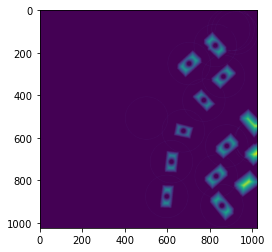

In [139]:
import cv2

src = cv2.imread("ㅎㅎㅎ.png")
dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
    M = cv2.moments(i)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    
    cv2.circle(dst, (cX, cY), 3, (255, 0, 0), 10)
    cv2.circle(dst, (cX, cY), 100, (0, 255, 0), 2)
    cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)
plt.imshow(dst)

gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
result = cv2.normalize(dist_transform, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)
plt.imshow(result)

# Signed Distance Transform

* cv2 distance Transform 함수 이용
* 바이너리 이미지의 subset에 대해서 각 픽셀이 어느 정도 떨어져 있는지를 알려줌.
* 어느정도 떨어져 있는지에 대한 계산방법은 
    * Euclidean distance(De), City block distance(D4), Chessboard distance(D8)이 있음
* 알고리즘
    1. 변환하려는 이미지와 같은 사이즈 이미지에 subset은 0으로, 나머지는 Nmax로 초기화합니다.
    2. Figure 2.10의 첫 번째 마스크를 사용하여 위에서 아래로, 왼쪽에서 오른쪽으로 위 식을 이용해 값을 변경합니다.
    3. Figure 2.10의 두 번째 마스크를 사용하여 아래에서 위로, 오른쪽에서 왼쪽으로 위 식을 이용해 값을 변경합니다.
    4. 만약 Nmax의 값이 남아있다면 2, 3의 과정을 반복합니다.


 

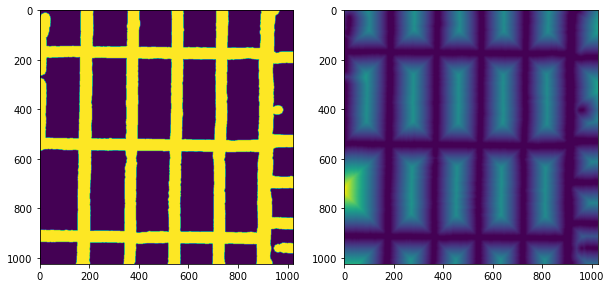

In [51]:
img = cv2.imread("히히히.png")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
 
dist = cv2.distanceTransform(thresh,cv2.DIST_L2, cv2.DIST_MASK_3)
ret,thresh1 = cv2.threshold(dist, 0.1*dist.max(),255,cv2.THRESH_BINARY_INV)
 
# Normalized processing, otherwise the effect will not be seen
cv2.normalize(dist,dist,0,1,cv2.NORM_MINMAX)


fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(thresh1)
plt.subplot(1, 2, 2)
plt.imshow(dist)

In [ ]:
rows,cols = gray.shape
for i in range(rows):
    for j in range(cols):
        if gray[i,j] == 255:
            gray[i,j] = 0
        elif gray[i,j] == 0:
            gray[i,j] = 255

In [16]:
import numpy as np
from scipy import ndimage as ndi

# lookup tables for bwmorph_thin

G123_LUT = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0], dtype=np.bool)

G123P_LUT = np.array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=np.bool)

def bwmorph_thin(image, n_iter=None):
   
    # check parameters
    if n_iter is None:
        n = -1
    elif n_iter <= 0:
        raise ValueError('n_iter must be > 0')
    else:
        n = n_iter

    # check that we have a 2d binary image, and convert it
    # to uint8
    skel = np.array(image).astype(np.uint8)

    if skel.ndim != 2:
        raise ValueError('2D array required')
    if not np.all(np.in1d(image.flat,(0,1))):
        raise ValueError('Image contains values other than 0 and 1')

    # neighborhood mask
    mask = np.array([[ 8,  4,  2],
                     [16,  0,  1],
                     [32, 64,128]],dtype=np.uint8)

    # iterate either 1) indefinitely or 2) up to iteration limit
    while n != 0:
        before = np.sum(skel) # count points before thinning

        # for each subiteration
        for lut in [G123_LUT, G123P_LUT]:
            # correlate image with neighborhood mask
            N = ndi.correlate(skel, mask, mode='constant')
            # take deletion decision from this subiteration's LUT
            D = np.take(lut, N)
            # perform deletion
            skel[D] = 0

        after = np.sum(skel) # coint points after thinning

        if before == after:
            # iteration had no effect: finish
            break

        # count down to iteration limit (or endlessly negative)
        n -= 1

    return skel.astype(np.bool)



In [34]:
from skimage.morphology import thin, skeletonize
import numpy as np
import matplotlib.pyplot as plt
#from foo import bwmorph_thin
img = cv2.imread("히히히.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
from skimage import morphology, filters

binary = gray > filters.threshold_otsu(gray)
skeleton = morphology.skeletonize(binary)

skeleton2 = bwmorph_thin(skeleton, n_iter = math.inf)

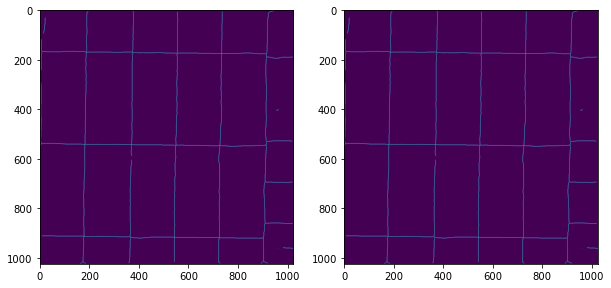

In [35]:
fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(skeleton)
plt.subplot(1, 2, 2)
plt.imshow(skeleton2)

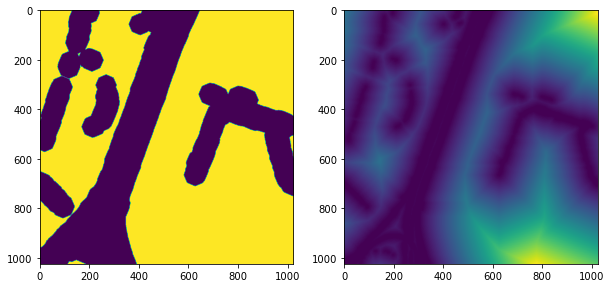

In [53]:
img = cv2.imread("도로예측2.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
 
dist = cv2.distanceTransform(thresh,cv2.DIST_L2, cv2.DIST_MASK_3)
ret,thresh1 = cv2.threshold(dist, 0.1*dist.max(),255,cv2.THRESH_BINARY)
 
# Normalized processing, otherwise the effect will not be seen
cv2.normalize(dist,dist,0,1,cv2.NORM_MINMAX)

fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(thresh1)
plt.subplot(1, 2, 2)
plt.imshow(dist)
plt.imshow(dist)

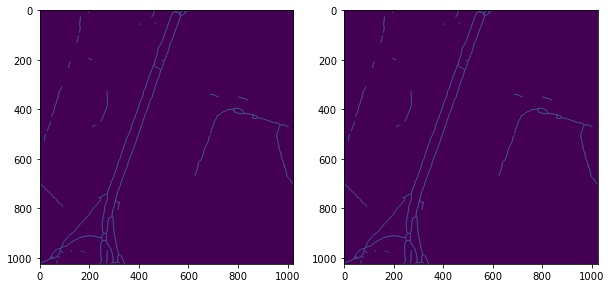

In [73]:
from skimage.morphology import thin, skeletonize
import numpy as np
import matplotlib.pyplot as plt
#from foo import bwmorph_thin
img = cv2.imread("도로예측2.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
from skimage import morphology, filters

binary = gray > filters.threshold_otsu(gray)
skeleton = morphology.skeletonize(binary)

skeleton2 = bwmorph_thin(skeleton, n_iter = math.inf)
fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(skeleton)
plt.subplot(1, 2, 2)
plt.imshow(skeleton2)

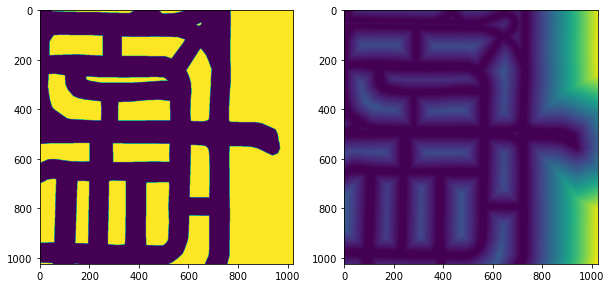

In [8]:
img = cv2.imread("example.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
 
dist = cv2.distanceTransform(thresh,cv2.DIST_L2, cv2.DIST_MASK_3)
ret,thresh1 = cv2.threshold(dist, 0.1*dist.max(),255,cv2.THRESH_BINARY)
 
# Normalized processing, otherwise the effect will not be seen
cv2.normalize(dist,dist,0,1,cv2.NORM_MINMAX)

fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(thresh1)
plt.subplot(1, 2, 2)
plt.imshow(dist)
plt.imshow(dist)

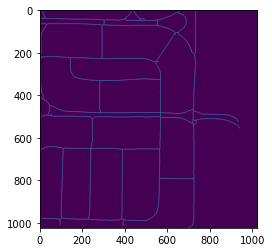

In [29]:
from skimage.morphology import thin, skeletonize
import numpy as np
import matplotlib.pyplot as plt
#from foo import bwmorph_thin
img = cv2.imread(".png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
from skimage import morphology, filters

binary = gray > filters.threshold_otsu(gray)
skeleton = morphology.skeletonize(binary)

skeleton = bwmorph_thin(skeleton, n_iter = math.inf)
plt.imshow(skeleton)

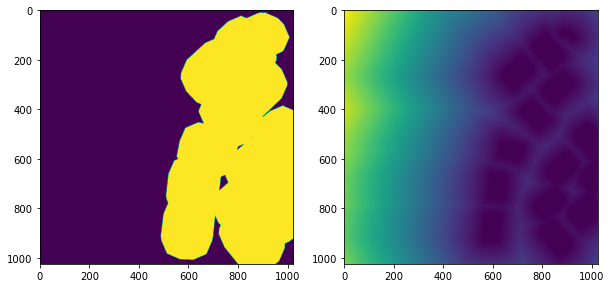

In [72]:
img = cv2.imread("ㅎㅎㅎ.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
 
dist = cv2.distanceTransform(thresh,cv2.DIST_L2, cv2.DIST_MASK_3)
ret,thresh1 = cv2.threshold(dist, 0.1*dist.max(),255,cv2.THRESH_BINARY_INV)
 
# Normalized processing, otherwise the effect will not be seen
cv2.normalize(dist,dist,0,1,cv2.NORM_MINMAX)

fig = plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(thresh1)
plt.subplot(1, 2, 2)
plt.imshow(dist)